In [ ]:
__Description__= "The following is the first part of my natural digit sequence analysis"
__author__ = "Rangel Rivera Ulises Osmar"
__copyright__ = ""
__credits__ = ["Rangel Ulises"]
__license__ = "MIT"
__version__ = "1.0"
__maintainer__ = "Rangel Rivera Ulises Osmar"
__email__ = "uo.rangelrivera@ugto.mx"
__status__ = "Completed"

# Necessary libraries

In [2]:
# Importing stuff

import mpmath as m
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Constants and another sequence

In [131]:
# PHI
prc = 10000
m.mp.dps = prc
c_n = m.phi*1

In [121]:
# Root 2
prc = 10000
m.mp.dps = prc
c_n = m.sqrt(2)

In [98]:
# e
prc = 10000
m.mp.dps = prc
c_n = m.e * 1

In [3]:
# PI
# The arctan of 1 represents how many radians there are in 45 degrees which is = Pi/4 = Arctan(1)
# So Pi is equal to: Pi = 4 * Atan(1) 
# Home made Pi is therefore:

prc = 10000
m.mp.dps = prc
c_n = m.atan(1)*4

In [ ]:
# Natural number sequence

prc = 10500

cn = [str(v_2+1) for v_2 in range(prc)]
v_3 = '0'
for i in cn:
    d_v = v_3 + i 
    v_3 = d_v
    
v_4,*v_5 = v_3
v_5.insert(0,v_4)

l_m = list(map(int,v_5))
l_m = np.array(l_m)
l_m = list(l_m[0:prc].flatten())

print('Digits in the sequence: \n {}'.format(len(l_m)))

If you're working with the natural numbers don't run the first code snippet numbered with a 1 in the comment.<br>
If you're working with a natural constant you do need to run it.

# Processing and visualizing data

In [4]:
# 1 Transforming the constant or values into a digit list

d_1, *r_d = str(c_n).split('.')
c_1,*u_r_d = r_d[0]
u_r_d.insert(0,c_1)
l_m = list(map(int,u_r_d))
l_m.insert(0,int(d_1))

In [5]:
# 2 We make a function to count how many of each number we have

def d_count(dl):
    try:
        if type(dl) != list:
            raise Exception('not a list')
    except Exception as inst_1:
        print('Error: input type is {}, please select a list as input next time!'.format(inst_1))
    else:
        r = []
        for i in range(10):
            if i in dl:
                oc = dl.count(i)
                l_p = [i,oc]
                r.append(l_p)
            else:
                pass
        return r


In [6]:
# 3 Here we define things we need for our graphs 

bd = d_count(l_m)
bd =sorted(bd,key=lambda bd: bd[1])

di = [str(x[0]) for x in bd]
print('Graph labels: \n {}'.format(di))
ocr = [x[1] for x in bd]
print('Times a digit appears: \n {}'.format(ocr))

m_ocr = min(ocr)
l_d = []

for i in ocr:
    d_1 = i - m_ocr
    l_d.append(d_1)

print('Frequency delta value in terms of the least frequent value: \n {}'.format(l_d))


Graph labels: 
 ['8', '0', '7', '3', '4', '9', '2', '6', '1', '5']
Times a digit appears: 
 [948, 968, 969, 975, 1012, 1014, 1021, 1021, 1026, 1046]
Frequency delta value in terms of the least frequent value: 
 [0, 20, 21, 27, 64, 66, 73, 73, 78, 98]


In [8]:
# 4 Here we create functions for our colors and percentages

# We map to the range [0,1]

def porc(l,aes=True):

    try:
        if type(l) != list:
            raise Exception('not a list')
    except Exception as inst_1:
        print('Error! the input is {}, please use the correct data type'.format(inst_1)) 
    
    else:
        if aes:
            m = max(l)
        else:
            m = sum(l)
        nl = []

        for i in l:
            p = round(i/m, 4)
            nl.append(p)

        return nl

def mp_clr(l, c=0.75, m='viridis'):

    cmap = matplotlib.cm.get_cmap(m)

    vs = porc(l)

    l_1 = list(map(cmap, vs))
    l_2 = np.array(l_1)
    l_2[:, 0:3] *= c

    return l_2

In [9]:
# 5 We define the array that has our colors
arr_mc = mp_clr(l_d)

In [10]:
# 6 Percentage of the digit frequency in terms of their sum

p_dg = porc(ocr,aes=False)
print(p_dg)
print(sum(p_dg))

[0.0948, 0.0968, 0.0969, 0.0975, 0.1012, 0.1014, 0.1021, 0.1021, 0.1026, 0.1046]
1.0


# Relative frequency graph

The next bar graph shows the relative frequency of all the digits in the analyzed sequence, this is a relative frequency because it's starting point is the least frequent digit this is done this way to show how every other digit compares to this one, otherwise it would be hard to tell if there's one digit that occurs more than others at first sight.

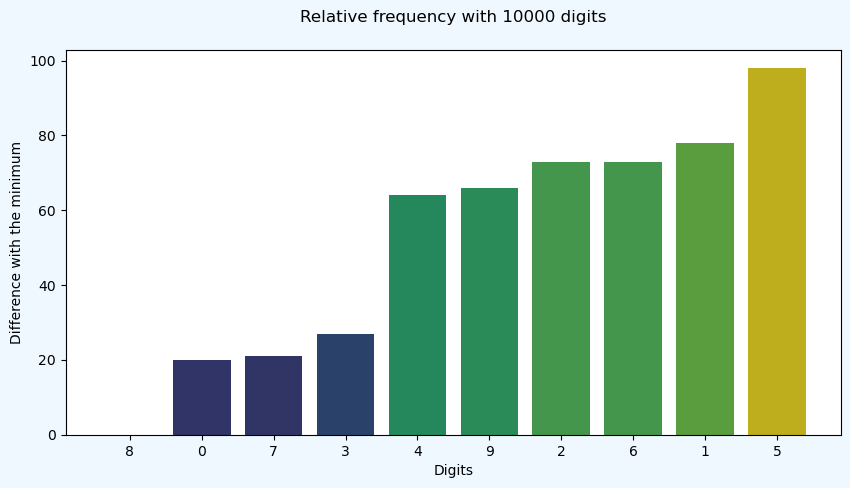

In [12]:
# 7 Good old bar graph

figs, ax = plt.subplots(facecolor='aliceblue',figsize=(10,5))
ax.set_facecolor('white')
ax.set_xlabel("Digits")
ax.set_ylabel("Difference with the minimum")
ax.set_title("Relative frequency with {} digits".format(len(l_m)), pad=20)
x_p = np.arange(len(ocr))
plt.bar(x_p,l_d,tick_label = di, color=arr_mc)
plt.show()
plt.close()

In [13]:
# 8 Arithmetic Mean

m_ar = lambda l: round(sum(l)/len(l),4)
m_a = round(m_ar(ocr),4)
print('Average digit occurance: \n{}'.format(m_a))

Average digit occurance: 
1000.0


In [14]:
# 9 Standard deviation in a population

def s_dv(m_a,l_v):
    sqs = []
    for i in l_v:
        sq = round((m_a - i)**2, 4)
        sqs.append(sq)
    s_sq = sum(sqs)
    Nu = len(sqs)
    return round(math.sqrt(s_sq/Nu),4)

In [15]:
# 10 Graph data summary

print('Occurance amount for every digit: \n{}'.format(ocr))
print('Labels: \n{}'.format(di))

Occurance amount for every digit: 
[948, 968, 969, 975, 1012, 1014, 1021, 1021, 1026, 1046]
Labels: 
['8', '0', '7', '3', '4', '9', '2', '6', '1', '5']


# Pie graph
In the following graph the color scheme shows in blue the digits that occured the least and in red the ones that occured the most.<br>
The tone of each color represents how small or large is the value compared to the rest.<br>

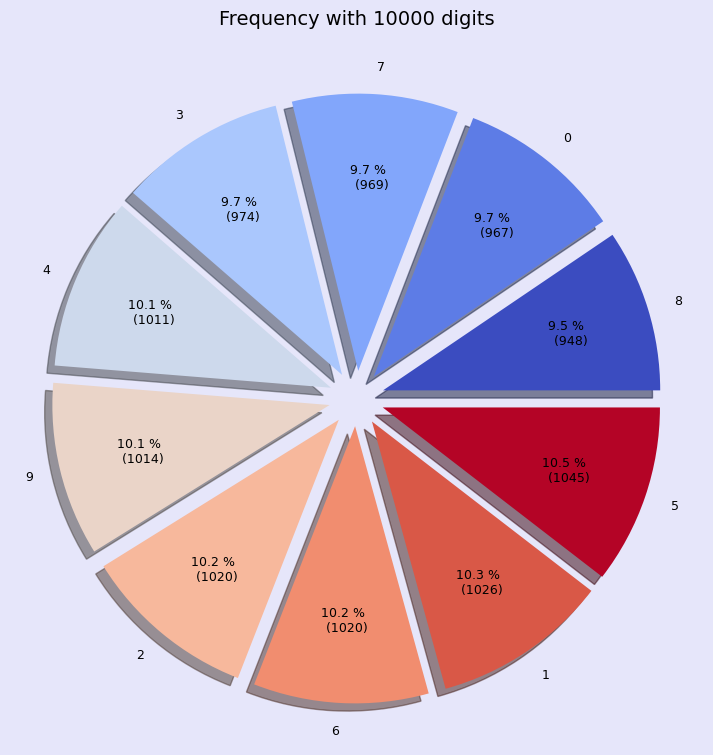

In [16]:
# Preparing the pie

fig, ax = plt.subplots(figsize = (9,9), facecolor = 'lavender')

ax.set_title('Frequency with {} digits'.format(len(l_m)), color = 'k', fontsize= 14, pad=20)

def dl(pct,vals):
    rl = int((pct/100.)*np.sum(vals))
    return "{:0.1f} % \n ({:d})".format(pct,rl)

if len(ocr) == 9:
    explode = np.repeat(0.1,9)
    se = pd.Series(ocr,copy=False)
elif len(ocr) == 10:
    explode = np.repeat(0.1,10)
    se = pd.Series(ocr,copy=False)

se.plot.pie(labels = di, cmap='coolwarm',
                shadow=True, explode=explode,
                autopct= lambda pct: dl(pct,ocr),
                 pctdistance=.7, textprops = {'fontsize':9})
plt.show()
plt.close()

# Motive

The reason behind this analysis came to me when I was studying the digits of Pi:<br>
3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067979 <br>
I realized that the following pattern occurs often in the sequence: xyx. (where x and y are positive integers in the range [0,9])<br>
As we can see here:<br>
3.[141] 5926 [535] 8 [979] [323] 84 [626] 43 [383] 27950288419716 [939] 937510582097 [494]45923078.<br>
So I thought "I wonder what's the behaviour of this pattern", that's when I became curious about this and decided to investigate further on my own.
In the following section we explore this pattern in Pi, and see if we can find it somewhere else.

In [17]:
# Algorithm and list for the gaps between XYX patterns

g_sl = []
l_sim = []
s_v = 1
g_c = 0
l_r = len(l_m)
ct = 0

while l_r != 0:

    fp = ct+1+s_v

    if fp >= len(l_m):
        break

    if l_m[ct] == l_m[fp]:

        xyx = [l_m[ct],l_m[fp-1],l_m[fp]]
        l_sim.append(xyx)

        g_sl.append(g_c)
        g_c = 0
        nv = 3
    
        ct = ct + nv
        l_r = l_r - nv
         
    else:
        g_c += 1
        ct += 1
        l_r = l_r - 1 


In [18]:
# Processing the list with XYX patterns

arr_sim = np.array(l_sim)

xvs = list(arr_sim[:,0:1].flatten())
yvs = list(arr_sim[:,1:2].flatten())

xs = np.array(sorted(d_count(xvs), key=lambda l: l[1]))
print('X values in XYX and their occurance: \n {} \n {}'.format(xs[:,0],xs[:,1]))
ys = np.array(sorted(d_count(yvs), key=lambda l: l[1]))
print('\n Y values in XYX and their occurance: \n {} \n {}'.format(ys[:,0],ys[:,1]))


X values in XYX and their occurance: 
 [7 0 6 2 3 8 4 5 9 1] 
 [ 71  74  74  79  79  80  92  94  95 101]

 Y values in XYX and their occurance: 
 [6 7 0 1 9 2 8 3 4 5] 
 [ 74  79  81  82  82  84  84  86  86 101]


# Line graph
The following graph shows how many digits pass till we find a new XYX pattern in the sequence.<br>
So every node in the graph where line fragments connect represent an XYX pattern.<br>
Y axis values represent how many digits passed before it was found.<br>
The X axis values only represent the index value for the XYX pattern found "like first, second, third, etc".<br>

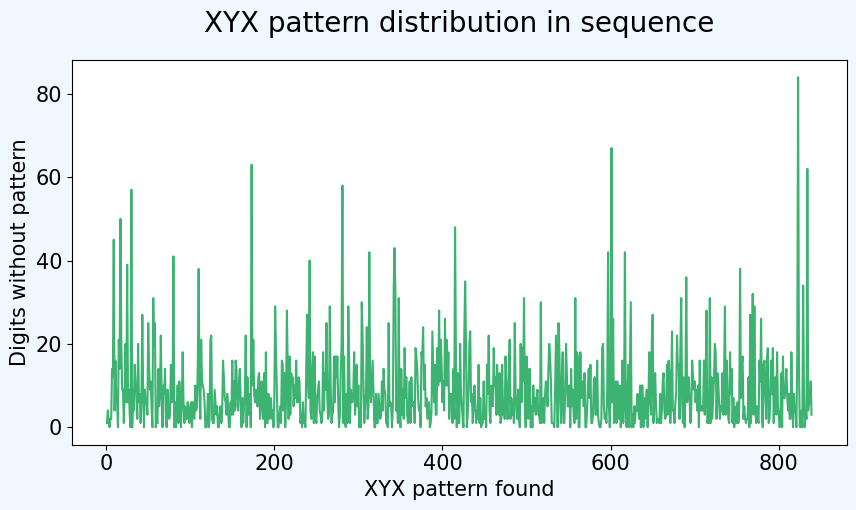

In [19]:
# Gráfica de la presencia de patrones en la secuencia númerica

plt.rc('font', size=15)
plt.rc('axes', titlesize=20)
figs,ax = plt.subplots(figsize=(10,5), facecolor='aliceblue')
ax.set_facecolor('white')
ax.set_ylabel('Digits without pattern')
ax.set_xlabel('XYX pattern found')
ax.set_title('XYX pattern distribution in sequence', pad=20)
i_s = np.linspace(1,len(g_sl),num=len(g_sl))
plt.plot(i_s,g_sl,color='mediumseagreen',linestyle='solid')
plt.show()
plt.close()

# XYX pattern analysis

In the following code snippets we have the steps followed to question and extract answers from the XYX patterns in the sequences analyzed.

In [20]:
# 1 we transform our patterns into strings
ts_l = []
top_pat = []
for i in l_sim:
    dl_1 = []
    for j in range(len(i)):
        tdv = str(i[j])
        dl_1.append(tdv)
    ts_l.append(int(''.join(dl_1)))


In [21]:
# 2 we find how many times each pattern shows up
u_vs = []
tpat_l = []

for i in ts_l:
    for k in range(len(ts_l)):
        if ts_l[k] not in u_vs:
            u_vs.append(ts_l[k])
        else:
            pass
print('Amount of unique XYX patterns: \n {}'.format(len(u_vs)))

for i in u_vs:
    tms = ts_l.count(i)
    tpat_l.append([i,tms])

stpat_l = sorted(tpat_l,key=lambda l: l[1],reverse=True)
stpat_l = stpat_l[0:4]
print('Top 5 most frequent patterns: \n {}'.format(stpat_l))
stpat_l = np.array(stpat_l)

tms_g = stpat_l[:,1]
patt = list(map(str,stpat_l[:,0]))


Amount of unique XYX patterns: 
 100
Top 5 most frequent patterns: 
 [[909, 19], [252, 16], [141, 15], [494, 14]]


# Popular XYX patterns

The following graph shows the top 5 most frequent patterns and how many times they occured in the sequence.<br>
The purpose of this visualization is to show how the XYX patterns behave in the sequence, this data for example allows us to answer the following question Is there a favourite pattern?.<br>

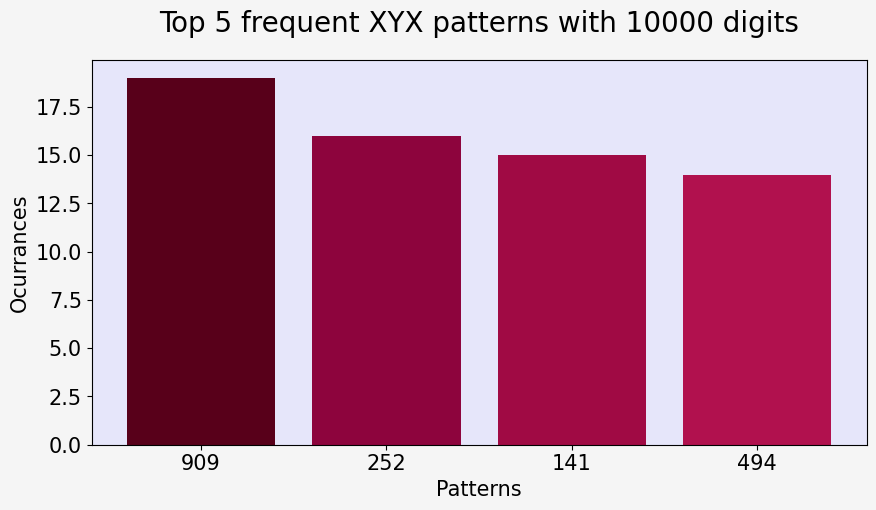

In [22]:
# Top 5 patterns

arr_mc3 = mp_clr(list(tms_g.flatten()),0.85,'PuRd')

figs, ax = plt.subplots(facecolor='whitesmoke',figsize=(10,5))
ax.set_facecolor('lavender')
ax.set_xlabel("Patterns")
ax.set_ylabel("Ocurrances")
ax.set_title("Top 5 frequent XYX patterns with {} digits".format(len(l_m)), pad=20)
x_p = np.arange(len(patt))
plt.bar(x_p,tms_g,tick_label = patt, color=arr_mc3)
plt.show()
plt.close()

# X values in XYX
The following bar graph lets us see how the X values behave in the pattern, which lets us answer questions like: Is there a preferred X value in these patterns within the sequence? and if there is How many times does it occur?.

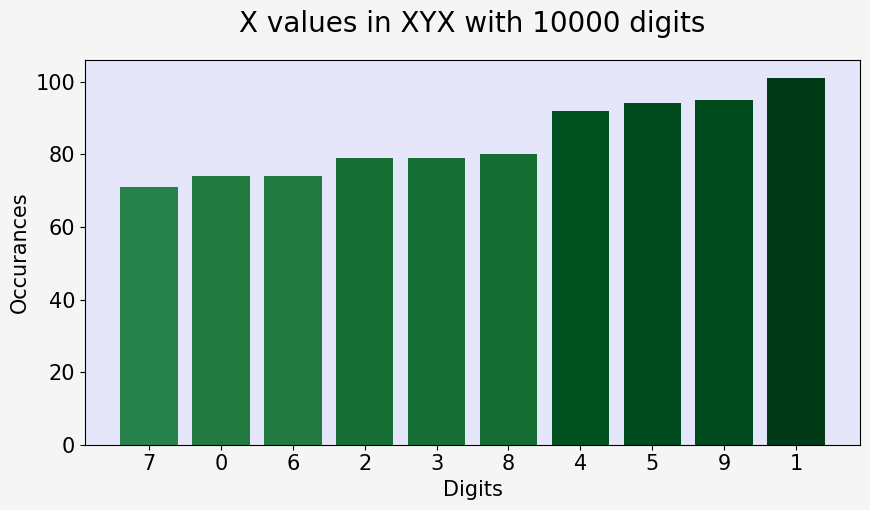

In [23]:
# X values bar graph

arr_mc1 = mp_clr(list(xs[:,1].flatten()),0.85,'BuGn')

figs, ax = plt.subplots(facecolor='whitesmoke',figsize=(10,5))
ax.set_facecolor('lavender')
ax.set_xlabel("Digits")
ax.set_ylabel("Occurances")
ax.set_title("X values in XYX with {} digits".format(len(l_m)), pad=20)
x_p = np.arange(len(xs))
plt.bar(x_p,xs[:,1],tick_label = list(map(str,xs[:,0])) , color=arr_mc1)
plt.show()
plt.close()

# Y values in XYX
The following bar graph lets us see how the Y values behave in the pattern, which lets us answer questions like: Is there a preferred X value in these patterns within the sequence? and if there is How many times does it occur?. It also lets us see the regularity of these digits in the XYX patterns.

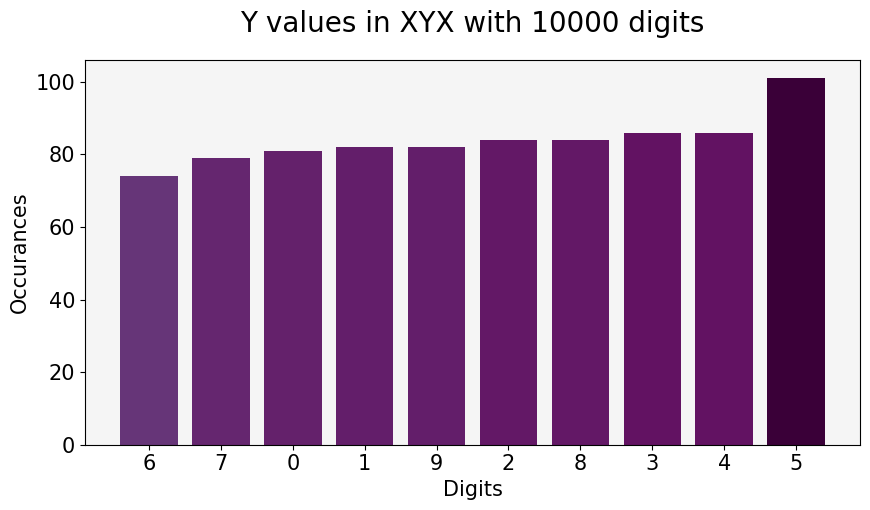

In [24]:
# Y values bar graph

arr_mc2 = mp_clr(list(ys[:,1].flatten()),0.75,'BuPu')

figs, ax = plt.subplots(facecolor='white',figsize=(10,5))
ax.set_facecolor('whitesmoke')
ax.set_xlabel("Digits")
ax.set_ylabel("Occurances")
ax.set_title("Y values in XYX with {} digits".format(len(l_m)), pad=20)
x_p = np.arange(len(ys))
plt.bar(x_p,ys[:,1],tick_label = list(map(str,ys[:,0])), color=arr_mc2)
plt.show()
plt.close()

# Important proportions

The following calculations are relevant because they reveal information related to the behaviour of these XYX patterns in the digit sequence, some of the values determined are the average gap size between XYX patterns and its standard deviation this type of data can be analyzed in an animation where we can view the avolution of said variables as we have more digits in the sequence. <br>

Another value that's worth studying is the amount of digits that form part of these XYX patterns vs how many don't, and how they change as we include more digits, this behaviour can be viewed in an animation.

In [25]:
# 3 we determine some important values

n_ga = len(g_sl)
v_rem = n_ga*3
v_rs = len(l_m)-v_rem

# percentages

pr_c = round(v_rem/len(l_m) * 100, 3)
pr_r = round(v_rs/len(l_m) * 100, 3)

print('Amount of gaps between XYX patterns: \n {}'.format(n_ga))

print('Amount of digits not in XYX patterns: \n {}'.format(v_rem))
print('Amount of digits in CYC patterns: \n {}'.format(v_rs))

print('Percentage of digits not in XYX patterns: \n {}%'.format(pr_c))
print('Percentage of digits in XYX patterns: \n {}%'.format(pr_r))

Amount of gaps between XYX patterns: 
 839
Amount of digits not in XYX patterns: 
 2517
Amount of digits in CYC patterns: 
 7483
Percentage of digits not in XYX patterns: 
 25.17%
Percentage of digits in XYX patterns: 
 74.83%


In [26]:
# Arithmetic mean and standard deviation of gap sizes
ma_gs = m_ar(g_sl)
print('Arithmetic mean of gap sizes between XYX patterns with {} digits: \n {}'.format(len(l_m),ma_gs))
sd_gs = s_dv(ma_gs,g_sl)
print('Standard deviation of gap sizes between XYX patterns with {} digits: \n {}'.format(len(l_m),sd_gs))

Arithmetic mean of gap sizes between XYX patterns with 10000 digits: 
 8.9118
Standard deviation of gap sizes between XYX patterns with 10000 digits: 
 9.697
